In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [14]:
# 加载数据
file_path = 'Loan_defaults_training.csv'
data = pd.read_csv(file_path, encoding='gbk')
data.sample(5)

,length,operator,dur_month_ave,dur_per_cnt,dur_work_ratio,range_mon_ave,district_mon_ave,dur_hour_00_06,dur_hour_06_08,dur_hour_08_12,...,dur_calltype_17968_ratio,dur_calltype_17969_ratio,dur_calltype_00_ratio,dur_order_2_raito,country_1,country_2,country_3,dur_country_1,dur_country_2,dur_country_3
5627,10,网通,608.750000,173.928571,0.260370,1.75,1.0,0.0,0.0,0.516632,...,0.0,0.0,0,0.830801,日本,NaN,NaN,2435,0,0
1632,4,网通,755.000000,215.714286,0.348344,2.00,1.0,0.0,0.0,0.474172,...,1.0,0.0,0,0.884106,新加坡,NaN,NaN,1510,0,0
3925,7,网通,291.666667,175.000000,0.525714,1.00,1.0,0.0,0.0,0.000000,...,1.0,0.0,0,1.000000,马来西亚,爱尔兰,NaN,460,415,0
3854,16,网通,80.000000,26.666667,1.000000,1.00,1.0,0.0,0.0,1.000000,...,0.0,1.0,0,1.000000,香港,NaN,NaN,80,0,0
3584,2,网通,260.000000,260.000000,1.000000,1.00,1.0,0.0,0.0,1.000000,...,1.0,0.0,0,1.000000,澳大利亚,NaN,NaN,260,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429 entries, 0 to 6428
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   length                    6429 non-null   int64  
 1   operator                  6429 non-null   object 
 2   dur_month_ave             6429 non-null   float64
 3   dur_per_cnt               6429 non-null   float64
 4   dur_work_ratio            6429 non-null   float64
 5   range_mon_ave             6429 non-null   float64
 6   district_mon_ave          6429 non-null   float64
 7   dur_hour_00_06            6429 non-null   float64
 8   dur_hour_06_08            6429 non-null   float64
 9   dur_hour_08_12            6429 non-null   float64
 10  dur_hour_12_18            6429 non-null   float64
 11  dur_hour_18_24            6429 non-null   float64
 12  dur_country_1_ratio       6429 non-null   float64
 13  dur_calltype_190_ratio    6429 non-null   int64  
 14  dur_call

In [16]:
# 选择数值型数据并保留 operator 属性
numeric_data = data.select_dtypes(include=['number'])
operator_data = data['operator']

numeric_data.sample(5)

,length,dur_month_ave,dur_per_cnt,dur_work_ratio,range_mon_ave,district_mon_ave,dur_hour_00_06,dur_hour_06_08,dur_hour_08_12,dur_hour_12_18,dur_hour_18_24,dur_country_1_ratio,dur_calltype_190_ratio,dur_calltype_17968_ratio,dur_calltype_17969_ratio,dur_calltype_00_ratio,dur_order_2_raito,dur_country_1,dur_country_2,dur_country_3
2892,16,443.000000,110.750000,0.969902,2.666667,1.666667,0.0,0.0,0.829947,0.167043,0.003010,0.622272,1,0.0,0.0,0,0.622272,827,502,0
5885,16,2522.250000,168.150000,0.923977,9.500000,3.000000,0.0,0.0,0.627119,0.372881,0.000000,0.774804,1,0.0,0.0,0,0.329270,7817,1409,688
2283,3,13.000000,13.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.000000,0.000000,1.000000,1,0.0,0.0,0,1.000000,13,0,0
3639,16,53.000000,26.500000,1.000000,2.000000,1.000000,0.0,0.0,0.509434,0.490566,0.000000,1.000000,1,0.0,0.0,0,1.000000,53,0,0
3504,16,806.666667,134.444444,0.695041,2.000000,1.333333,0.0,0.0,0.135537,0.680579,0.183884,0.983884,1,0.0,0.0,0,0.713223,2381,39,0


In [17]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. 异常值过滤
# 过滤掉任意列中超出3倍标准差的值
filtered_data = numeric_data.copy()
for column in filtered_data.columns:
    if filtered_data[column].dtype in ['int64', 'float64']:
        mean = filtered_data[column].mean()
        std = filtered_data[column].std()
        filtered_data = filtered_data[(filtered_data[column] >= mean - 3 * std) & (filtered_data[column] <= mean + 3 * std)]

# 保留与过滤后的数据对应的 operator 列
filtered_data['operator'] = operator_data.loc[filtered_data.index]

filtered_data

,length,dur_month_ave,dur_per_cnt,dur_work_ratio,range_mon_ave,district_mon_ave,dur_hour_00_06,dur_hour_06_08,dur_hour_08_12,dur_hour_12_18,...,dur_country_1_ratio,dur_calltype_190_ratio,dur_calltype_17968_ratio,dur_calltype_17969_ratio,dur_calltype_00_ratio,dur_order_2_raito,dur_country_1,dur_country_2,dur_country_3,operator
0,7,996.75,153.346154,0.946827,4.00,1.0,0.000000,0.016554,0.117131,0.345122,...,1.000000,0,0.000000,1.000000,0,0.425884,3987,0,0,联通
1,3,88.00,88.000000,0.000000,1.00,1.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,0,1.000000,0.000000,0,1.000000,88,0,0,联通
2,1,1855.00,168.636364,0.381671,3.00,1.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,0,0.000000,1.000000,0,0.791914,1855,0,0,联通
3,12,1738.00,178.256410,0.516542,1.75,1.0,0.000000,0.000000,0.023303,0.514960,...,1.000000,0,0.070771,0.929229,0,1.000000,6952,0,0,联通
4,10,4316.00,269.750000,0.992431,2.00,1.0,0.174776,0.000000,0.001081,0.173077,...,1.000000,0,1.000000,0.000000,0,0.998842,12948,0,0,联通
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6423,3,113.00,113.000000,1.000000,1.00,1.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,1,0.000000,0.000000,0,1.000000,113,0,0,网通
6424,4,568.00,284.000000,1.000000,1.00,1.0,0.000000,0.000000,0.000000,0.471831,...,1.000000,0,1.000000,0.000000,0,1.000000,568,0,0,网通
6425,4,225.00,75.000000,1.000000,1.00,1.0,0.000000,0.000000,1.000000,0.000000,...,1.000000,1,0.000000,0.000000,0,1.000000,225,0,0,网通
6427,11,828.00,118.285714,1.000000,4.00,3.0,0.000000,0.000000,0.158213,0.841787,...,0.620773,1,0.000000,0.000000,0,0.705918,1028,545,77,网通


In [7]:
# 创建一个 LabelEncoder 对象
label_encoder = LabelEncoder()

# 对 operator 列进行标签编码
numeric_data['operator'] = label_encoder.fit_transform(numeric_data['operator'])

# 查看前几行数据
numeric_data.head()

,length,dur_month_ave,dur_per_cnt,dur_work_ratio,range_mon_ave,district_mon_ave,dur_hour_00_06,dur_hour_06_08,dur_hour_08_12,dur_hour_12_18,...,dur_country_1_ratio,dur_calltype_190_ratio,dur_calltype_17968_ratio,dur_calltype_17969_ratio,dur_calltype_00_ratio,dur_order_2_raito,dur_country_1,dur_country_2,dur_country_3,operator
0,7,996.75,153.346154,0.946827,4.00,1.0,0.000000,0.016554,0.117131,0.345122,...,1.0,0,0.000000,1.000000,0,0.425884,3987,0,0,3
1,3,88.00,88.000000,0.000000,1.00,1.0,0.000000,0.000000,0.000000,0.000000,...,1.0,0,1.000000,0.000000,0,1.000000,88,0,0,3
2,1,1855.00,168.636364,0.381671,3.00,1.0,0.000000,0.000000,0.000000,0.000000,...,1.0,0,0.000000,1.000000,0,0.791914,1855,0,0,3
3,12,1738.00,178.256410,0.516542,1.75,1.0,0.000000,0.000000,0.023303,0.514960,...,1.0,0,0.070771,0.929229,0,1.000000,6952,0,0,3
4,10,4316.00,269.750000,0.992431,2.00,1.0,0.174776,0.000000,0.001081,0.173077,...,1.0,0,1.000000,0.000000,0,0.998842,12948,0,0,3


In [19]:
# 将数值数据和 operator 列分开
filtered_numeric_data = filtered_data.drop(columns=['operator'])
filtered_operator_data = filtered_data['operator']

In [20]:

# 2. 标准化
scaler = StandardScaler()
standardized_data = scaler.fit_transform(filtered_numeric_data)
standardized_data = pd.DataFrame(standardized_data, columns=filtered_numeric_data.columns)

# 将 operator 列加回来
standardized_data['operator'] = filtered_operator_data.reset_index(drop=True)

# 显示标准化后的数据
print("标准化后的数据：")
print(standardized_data.head())

# 3. 规范化
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(filtered_numeric_data)
normalized_data = pd.DataFrame(normalized_data, columns=filtered_numeric_data.columns)

# 将 operator 列加回来
normalized_data['operator'] = filtered_operator_data.reset_index(drop=True)

# 显示规范化后的数据
print("规范化后的数据：")
print(normalized_data.head())

标准化后的数据：
     length  dur_month_ave  dur_per_cnt  dur_work_ratio  range_mon_ave  \
0 -0.248618       0.295012    -0.016301        0.623389       1.268220   
1 -0.975466      -0.680281    -0.574044       -2.055218      -0.603766   
2 -1.338890       1.216106     0.114204       -0.975457       0.644225   
3  0.659942       1.090539     0.196313       -0.593903      -0.135769   
4  0.296518       3.857310     0.977230        0.752404       0.020229   

   district_mon_ave  dur_hour_00_06  dur_hour_06_08  dur_hour_08_12  \
0         -0.353825       -0.205311        0.100601       -0.473081   
1         -0.353825       -0.205311       -0.251813       -0.814857   
2         -0.353825       -0.205311       -0.251813       -0.814857   
3         -0.353825       -0.205311       -0.251813       -0.746862   
4         -0.353825        3.956650       -0.251813       -0.811702   

   dur_hour_12_18  ...  dur_country_1_ratio  dur_calltype_190_ratio  \
0       -0.142134  ...             0.352035     

# 使用K-Means进行聚类

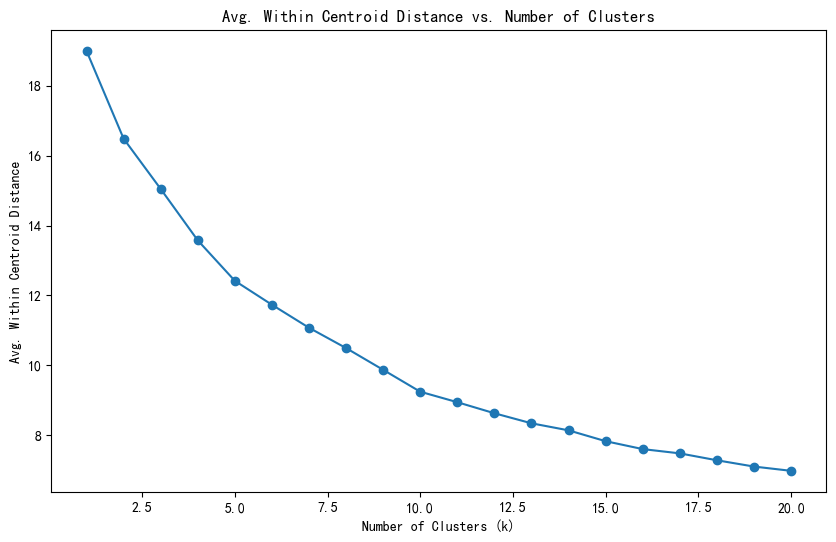

In [25]:
def calculate_avg_within_centroid_distance(data, max_k):
    avg_within_centroid_distances = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        avg_distance = kmeans.inertia_ / len(data)
        avg_within_centroid_distances.append(avg_distance)
    return avg_within_centroid_distances

# 设置最大的聚类数
max_k = 20

# 计算类内平均距离
avg_within_centroid_distances = calculate_avg_within_centroid_distance(standardized_data.drop(columns=['operator']), max_k)

# 绘制类内平均距离与聚类数的关系图
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), avg_within_centroid_distances, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Avg. Within Centroid Distance')
plt.title('Avg. Within Centroid Distance vs. Number of Clusters')
plt.show()
